In [7]:
pip install dmba

In [1]:
from pathlib import Path

import math
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, LassoCV, BayesianRidge
from sklearn.metrics import accuracy_score, roc_curve, auc
import statsmodels.formula.api as sm
import matplotlib.pylab as plt

from dmba import regressionSummary, classificationSummary, exhaustive_search
from dmba import liftChart, gainsChart
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score

In [7]:
car_df = pd.read_csv('Toyata.csv', encoding='cp1252')
car_df_training = car_df.iloc[0:1000]
car_df_training.head()


NameError: name 'Flase' is not defined

In [8]:
car_df_training.to_csv('TrainingDataToyotaCorolla.csv', index=False)

In [6]:
car_df_test = car_df.iloc[1001: ]
car_df_test.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Parking_Assistant,Tow_Bar
1001,1006,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA AUT3...,8950,66,3,1999,39222,Petrol,86,1,...,0,1,0,0,1,1,0,0,0,1
1002,1007,TOYOTA Corolla 1.6 16V HATCHB LINEA TERRA 2/3-...,8250,66,3,1999,39144,Petrol,110,1,...,1,1,0,0,0,1,0,0,0,0
1003,1008,TOYOTA Corolla 1.6 16V LIFTB LINEA LUNA 4/5-Doors,10250,62,7,1999,39000,Petrol,110,1,...,1,1,0,1,0,1,1,0,0,0
1004,1009,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,8750,61,8,1999,38019,Petrol,110,1,...,0,1,0,0,1,1,0,0,0,1
1005,1010,TOYOTA Corolla 1.6 16V LIFTB LINEA TERRA 4/5-D...,9750,68,1,1999,37759,Petrol,110,1,...,0,1,0,0,1,1,0,0,0,0


In [9]:
car_df_test.to_csv('TestingDataToyotaCorolla.csv', index=False)

In [10]:
predictors = ['Age_08_04', 'KM', 'Fuel_Type', 'Automatic','Doors','Quarterly_Tax','Mfr_Guarantee',
              'Guarantee_Period', 'Airco', 'Automatic_airco','CD_Player','Powered_Windows','Sport_Model','Tow_Bar']
              
              
outcome = 'Price'

In [11]:
# Partition data into predictors (x) and output (y)
X = pd.get_dummies(car_df[predictors], drop_first=True)
y = car_df[outcome]

In [12]:
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.4, random_state=0)

In [13]:
car_lm = LinearRegression()
car_lm.fit(train_X, train_y)

LinearRegression()

In [14]:
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': car_lm.coef_}))

           Predictor  coefficient
0          Age_08_04  -113.236798
1                 KM    -0.018525
2          Automatic   507.996415
3              Doors   196.790850
4      Quarterly_Tax    14.800570
5      Mfr_Guarantee   293.117816
6   Guarantee_Period    83.097268
7              Airco   202.655424
8    Automatic_airco  3583.078777
9          CD_Player   243.361148
10   Powered_Windows   621.949559
11       Sport_Model   245.545991
12           Tow_Bar  -196.153475
13  Fuel_Type_Diesel  1326.134224
14  Fuel_Type_Petrol  1597.025860


In [15]:
regressionSummary(train_y, car_lm.predict(train_X))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 1204.7559
            Mean Absolute Error (MAE) : 888.6796
          Mean Percentage Error (MPE) : -0.8812
Mean Absolute Percentage Error (MAPE) : 8.5186


In [16]:
car_lm_pred = car_lm.predict(valid_X)

In [17]:
result = pd.DataFrame({'Predicted': car_lm_pred, 'Actual': valid_y, 'Residual': valid_y - car_lm_pred})
print(result.head(20))

         Predicted  Actual     Residual
651    8272.830179    7950  -322.830179
411   10865.625391   10950    84.374609
342   13534.432196   14950  1415.567804
1298   7293.021062    7500   206.978938
483    9744.337371    9900   155.662629
1017   9429.566158    8900  -529.566158
1063   6891.634184    6950    58.365816
31    15500.032994   15750   249.967006
467   10969.667051   11950   980.332949
477   11080.380513    9930 -1150.380513
1050   7811.695450    8500   688.304550
474   10371.470451   10450    78.529549
533   11147.772116   11895   747.227884
922    9254.371792    9950   695.628208
1101   7478.478403    6450 -1028.478403
34    15295.603858   15500   204.396142
443   11235.681922   11950   714.318078
1328   7682.978841    6900  -782.978841
295   11919.525822   10950  -969.525822
1368  11665.810621    9750 -1915.810621


In [18]:
regressionSummary(valid_y, car_lm.predict(valid_X))


Regression statistics

                      Mean Error (ME) : -67.2700
       Root Mean Squared Error (RMSE) : 1378.3964
            Mean Absolute Error (MAE) : 980.9252
          Mean Percentage Error (MPE) : -1.9590
Mean Absolute Percentage Error (MAPE) : 9.8863


In [19]:
car_lm_pred = car_lm.predict(valid_X)
all_residuals = valid_y - car_lm_pred

In [20]:
print(len(all_residuals[(all_residuals > -1406) & (all_residuals < 1406)]) / len(all_residuals))

0.7721739130434783


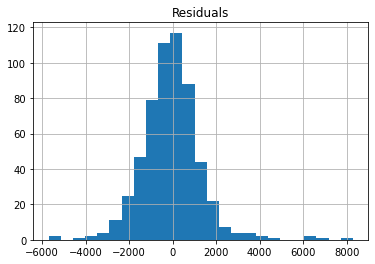

In [21]:
pd.DataFrame({'Residuals': all_residuals}).hist(bins=25)
plt.show()

In [31]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model
def score_model(model, variables):
    pred_y = model.predict(train_X[list(variables)])
# we negate as score is optimized to be as low as possible
    return -adjusted_r2_score(train_y, pred_y, model)

In [23]:
allVariables = train_X.columns
results = exhaustive_search(allVariables, train_model, score_model)
print(results)

[{'n': 1, 'variables': ['Age_08_04'], 'score': -0.7946574567767163, 'model': LinearRegression()}, {'n': 2, 'variables': ['Age_08_04', 'Automatic_airco'], 'score': -0.8496554849308152, 'model': LinearRegression()}, {'n': 3, 'variables': ['Age_08_04', 'KM', 'Automatic_airco'], 'score': -0.8622907976996635, 'model': LinearRegression()}, {'n': 4, 'variables': ['Age_08_04', 'KM', 'Quarterly_Tax', 'Automatic_airco'], 'score': -0.873904661270158, 'model': LinearRegression()}, {'n': 5, 'variables': ['Age_08_04', 'KM', 'Quarterly_Tax', 'Automatic_airco', 'Powered_Windows'], 'score': -0.8829293248263932, 'model': LinearRegression()}, {'n': 6, 'variables': ['Age_08_04', 'KM', 'Quarterly_Tax', 'Guarantee_Period', 'Automatic_airco', 'Powered_Windows'], 'score': -0.8855490435149351, 'model': LinearRegression()}, {'n': 7, 'variables': ['Age_08_04', 'KM', 'Doors', 'Quarterly_Tax', 'Guarantee_Period', 'Automatic_airco', 'Powered_Windows'], 'score': -0.8878179604689815, 'model': LinearRegression()}, {'n

In [24]:
data = []
for result in results:
    model = result['model']
    variables = list(result['variables'])
    AIC = AIC_score(train_y, model.predict(train_X[variables]), model)
    d = {'n': result['n'], 'r2adj': -result['score'], 'AIC':AIC}
    d.update({var: var in result['variables'] for var in allVariables})
    data.append(d)


In [25]:
pd.DataFrame(data, columns=('n', 'r2adj', 'AIC') + tuple(sorted(allVariables)))

,n,r2adj,AIC,Age_08_04,Airco,Automatic,Automatic_airco,CD_Player,Doors,Fuel_Type_Diesel,Fuel_Type_Petrol,Guarantee_Period,KM,Mfr_Guarantee,Powered_Windows,Quarterly_Tax,Sport_Model,Tow_Bar
0,1,0.794657,15245.900276,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,2,0.849655,14978.480528,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False
2,3,0.862291,14903.893393,True,False,False,True,False,False,False,False,False,True,False,False,False,False,False
3,4,0.873905,14829.028912,True,False,False,True,False,False,False,False,False,True,False,False,True,False,False
4,5,0.882929,14766.084224,True,False,False,True,False,False,False,False,False,True,False,True,True,False,False
5,6,0.885549,14747.590973,True,False,False,True,False,False,False,False,True,True,False,True,True,False,False
6,7,0.887818,14731.341953,True,False,False,True,False,True,False,False,True,True,False,True,True,False,False
7,8,0.889357,14720.436994,True,False,False,True,False,True,False,False,True,True,True,True,True,False,False
8,9,0.890253,14714.423322,True,False,True,True,False,True,False,False,True,True,True,True,True,False,False
9,10,0.891160,14708.271982,True,False,True,True,False,True,False,False,True,True,True,True,True,True,False


In [34]:
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model
def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

allVariables = train_X.columns
best_model, best_variables = backward_elimination(allVariables, train_model,
score_model, verbose=True)
print(best_variables)
regressionSummary(valid_y, best_model.predict(valid_X[best_variables]))

Variables: Age_08_04, KM, HP, Met_Color, Automatic, CC, Doors, Quarterly_Tax, Weight, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=10422.30
Step: score=10420.33, remove CC
Step: score=10418.79, remove Met_Color
Step: score=10417.29, remove Doors
Step: score=10417.29, remove None
['Age_08_04', 'KM', 'HP', 'Automatic', 'Quarterly_Tax', 'Weight', 'Fuel_Type_Diesel', 'Fuel_Type_Petrol']

Regression statistics

                      Mean Error (ME) : 103.3045
       Root Mean Squared Error (RMSE) : 1314.4844
            Mean Absolute Error (MAE) : 1016.8875
          Mean Percentage Error (MPE) : -0.2700
Mean Absolute Percentage Error (MAPE) : 8.9984


In [28]:
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[list(variables)], train_y)
    return model
def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model, best_variables = forward_selection(train_X.columns, train_model, score_model, verbose=True)
print(best_variables)

Variables: Age_08_04, KM, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=16607.93, constant
Step: score=15245.90, add Age_08_04
Step: score=14978.48, add Automatic_airco
Step: score=14903.89, add KM
Step: score=14829.03, add Quarterly_Tax
Step: score=14766.08, add Powered_Windows
Step: score=14747.59, add Guarantee_Period
Step: score=14731.34, add Doors
Step: score=14720.44, add Mfr_Guarantee
Step: score=14714.42, add Automatic
Step: score=14708.27, add Sport_Model
Step: score=14706.25, add Tow_Bar
Step: score=14704.26, add Airco
Step: score=14702.91, add CD_Player
Step: score=14702.91, add None
['Age_08_04', 'Automatic_airco', 'KM', 'Quarterly_Tax', 'Powered_Windows', 'Guarantee_Period', 'Doors', 'Mfr_Guarantee', 'Automatic', 'Sport_Model', 'Tow_Bar', 'Airco', 'CD_Player']


In [29]:
best_model, best_variables = stepwise_selection(train_X.columns, train_model, score_model,
verbose=True)
print(best_variables)

Variables: Age_08_04, KM, Automatic, Doors, Quarterly_Tax, Mfr_Guarantee, Guarantee_Period, Airco, Automatic_airco, CD_Player, Powered_Windows, Sport_Model, Tow_Bar, Fuel_Type_Diesel, Fuel_Type_Petrol
Start: score=16607.93, constant
Step: score=15245.90, add Age_08_04
Step: score=14978.48, add Automatic_airco
Step: score=14903.89, add KM
Step: score=14829.03, add Quarterly_Tax
Step: score=14766.08, add Powered_Windows
Step: score=14747.59, add Guarantee_Period
Step: score=14731.34, add Doors
Step: score=14720.44, add Mfr_Guarantee
Step: score=14714.42, add Automatic
Step: score=14708.27, add Sport_Model
Step: score=14706.25, add Tow_Bar
Step: score=14704.26, add Airco
Step: score=14702.91, add CD_Player
Step: score=14702.91, unchanged None
['Age_08_04', 'Automatic_airco', 'KM', 'Quarterly_Tax', 'Powered_Windows', 'Guarantee_Period', 'Doors', 'Mfr_Guarantee', 'Automatic', 'Sport_Model', 'Tow_Bar', 'Airco', 'CD_Player']
